In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv(r"C:\Users\USER\Downloads\NCI60_X.csv",low_memory=False)

In [3]:
data

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
60,V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
61,V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
62,V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6831 entries, Unnamed: 0 to 6830
dtypes: float64(6830), object(1)
memory usage: 3.3+ MB


In [5]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,-0.079551,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,0.890365,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-1.850020,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.660019,-0.177500,-0.327500,-0.328750,-0.232519,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.304980,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,2.929980,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000


In [6]:
data.columns[data.isna().sum()/len(data.index)*100>90]

Index([], dtype='object')

In [7]:
data.columns

Index(['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '6821', '6822', '6823', '6824', '6825', '6826', '6827', '6828', '6829',
       '6830'],
      dtype='object', length=6831)

In [8]:
data=data.drop('Unnamed: 0',axis=1)

In [9]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


# hc_clustering without PCA

In [10]:
x=data

In [11]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [12]:
mergings = linkage(x, method = "complete")

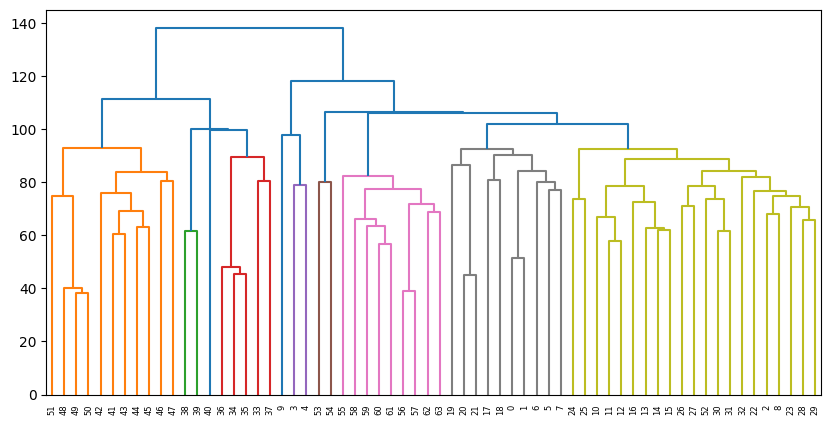

In [13]:
plt.figure(figsize=(10,5))
dendrogram(mergings)
plt.show()

In [14]:
labels = fcluster(mergings, 85, criterion='distance')

In [15]:
labels

array([14, 14, 17,  7,  7, 14, 14, 14, 17,  8, 16, 16, 16, 16, 16, 16, 16,
       13, 13, 12, 11, 11, 17, 17, 15, 15, 17, 17, 17, 17, 17, 17, 17,  5,
        4,  4,  4,  5,  3,  3,  6,  2,  2,  2,  2,  2,  2,  2,  1,  1,  1,
        1, 17,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10], dtype=int32)

In [16]:
x['hc_clusters']=labels

In [17]:
x

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,hc_clusters
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,14
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,14
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,17
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,7
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000,10
60,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000,10
61,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000,10
62,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000,10


# hc_clustering with PCA

In [18]:
data2=data

In [19]:
data2.corr()

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,hc_clusters
1,1.000000,0.369523,0.224803,0.072525,-0.111652,0.082434,0.102550,0.383263,0.146702,0.200520,...,-0.110626,-0.104605,-0.175310,-0.201395,-0.039783,-0.036840,-0.007935,-0.082233,-0.068994,0.161913
2,0.369523,1.000000,0.365087,0.234746,0.156462,0.190006,0.347300,0.046215,0.259777,0.043624,...,-0.100822,-0.036153,0.002595,0.016097,-0.048616,0.007148,-0.083373,-0.042292,-0.046844,0.082009
3,0.224803,0.365087,1.000000,0.234463,0.105175,0.025614,0.101811,0.008317,-0.044394,0.223556,...,0.026336,0.078713,0.051154,0.075279,-0.125612,-0.035144,0.116060,0.095782,0.080308,-0.007284
4,0.072525,0.234746,0.234463,1.000000,0.139227,0.072153,0.050299,-0.117858,0.032301,-0.157428,...,-0.237242,-0.193870,-0.230741,-0.081435,-0.196066,0.007615,-0.050696,-0.042771,0.010048,-0.105526
5,-0.111652,0.156462,0.105175,0.139227,1.000000,0.252648,0.249501,-0.071547,-0.044091,-0.150494,...,-0.202877,-0.146788,-0.080164,-0.119049,0.091374,0.069646,-0.025194,0.028185,-0.048320,0.244652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,-0.036840,0.007148,-0.035144,0.007615,0.069646,-0.290953,0.105614,0.085815,0.016968,0.048932,...,0.438254,0.476920,0.344669,0.408825,0.802684,1.000000,0.422170,0.386220,0.329532,-0.002607
6828,-0.007935,-0.083373,0.116060,-0.050696,-0.025194,-0.223602,0.046420,0.175311,-0.061362,0.123515,...,0.342030,0.372787,0.327562,0.319074,0.450702,0.422170,1.000000,0.433611,0.304976,-0.072638
6829,-0.082233,-0.042292,0.095782,-0.042771,0.028185,-0.223896,-0.096546,0.033388,0.015082,0.195558,...,0.162107,0.298043,0.189013,0.387155,0.372070,0.386220,0.433611,1.000000,0.737903,-0.423987
6830,-0.068994,-0.046844,0.080308,0.010048,-0.048320,-0.217493,-0.193918,0.014713,0.026882,0.226114,...,0.238606,0.287673,0.254872,0.361875,0.295309,0.329532,0.304976,0.737903,1.000000,-0.407616


In [20]:
from sklearn .decomposition import PCA

In [22]:
pca=PCA(n_components=50)
data2_decomposed=pca.fit_transform(data2)

In [23]:
pca_data=pd.DataFrame(data2_decomposed, columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20","PC21","PC22","PC23","PC24","PC25","PC26","PC27","PC28","PC29","PC30","PC31","PC32","PC33","PC34","PC35","PC36","PC37","PC38","PC39","PC40","PC41","PC42","PC43","PC44","PC45","PC46","PC47","PC48","PC49","PC50"])

In [24]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-20.178901,-0.028234,5.898787,4.815400,4.869198,18.104104,-8.145323,22.706564,-16.688720,-4.747185,...,-0.898254,6.503237,2.764233,-1.858372,-1.344651,2.339671,-0.699413,-1.354084,4.850334,5.812717
1,-21.927186,1.544122,8.950589,6.667258,2.162471,16.078005,-11.055368,24.780117,-19.710835,-11.758788,...,-3.610188,0.948760,-2.541878,2.328720,2.594235,2.129799,-4.448434,-5.863027,-4.664542,0.640770
2,-25.809998,-1.444318,6.883546,3.177898,10.904174,16.136831,0.298023,5.630941,-5.901164,0.935845,...,4.413849,1.777416,-12.748742,7.248836,-8.325411,-9.747813,-1.173007,19.033145,3.836543,-5.307270
3,-36.015498,12.018860,4.813126,17.608981,16.331533,33.273364,2.485405,3.841488,4.992125,-3.528734,...,-0.661000,-6.226497,11.167771,8.186043,1.024203,-0.031234,-5.222368,-3.362784,-5.170854,-9.833682
4,-48.629903,2.136663,16.757318,18.230964,14.340266,18.580478,26.961883,-6.318432,15.754530,5.939996,...,-4.571471,8.239098,-3.245473,-10.396560,3.201960,-0.241623,-3.381706,-0.790640,-1.205066,5.151457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-14.861246,44.371585,-14.843046,-7.965730,-1.476332,-5.329850,1.257102,-3.990506,18.714396,-3.903492,...,4.958778,-5.422439,-9.620444,-6.954443,5.510125,-9.463817,5.167187,-6.376008,-1.765663,-7.663314
60,-1.596639,35.378287,-11.259917,-0.498856,2.123243,-4.299920,-1.861336,1.012899,12.323170,-0.131133,...,-0.588432,5.070334,-4.870977,5.763201,5.266581,2.031916,-1.742633,5.604326,-5.949810,2.242528
61,-13.822620,33.511078,-14.754605,-0.252203,2.404024,-0.874952,1.051662,-0.092561,6.948748,1.343054,...,0.310519,11.603573,1.591706,1.709035,0.010880,7.701385,-3.403059,1.902359,-6.877835,-2.746495
62,-12.188662,45.392985,-10.066239,-1.029449,2.461828,-1.717472,2.584998,0.919203,4.076526,4.772540,...,-12.473756,-9.963372,-4.471526,4.203789,-8.611994,5.732299,-0.114443,-1.399128,2.064381,-1.966161


In [25]:
pca.explained_variance_ratio_*100

array([15.18998662,  8.2453806 ,  6.53966148,  4.31012247,  3.81853173,
        3.48994925,  2.91145047,  2.83945733,  2.62715563,  2.15177042,
        2.08721048,  2.00372167,  1.82121354,  1.75639098,  1.6631156 ,
        1.60674246,  1.57041025,  1.46951904,  1.43791922,  1.4037474 ,
        1.36439189,  1.28871111,  1.25294185,  1.19304487,  1.1711188 ,
        1.10117524,  1.05876377,  1.02656661,  1.0201912 ,  0.98721374,
        0.95142456,  0.93134719,  0.8700808 ,  0.86013423,  0.83202895,
        0.82355981,  0.81276621,  0.79301036,  0.75916067,  0.74091781,
        0.72433331,  0.70956822,  0.6946403 ,  0.67537964,  0.66092127,
        0.62518371,  0.61777722,  0.59083956,  0.54316141,  0.53280607])

In [26]:
sum(pca.explained_variance_ratio_*100)

95.1566170243367

In [31]:
y=pca_data

In [32]:
mergings = linkage(y, method = "complete")

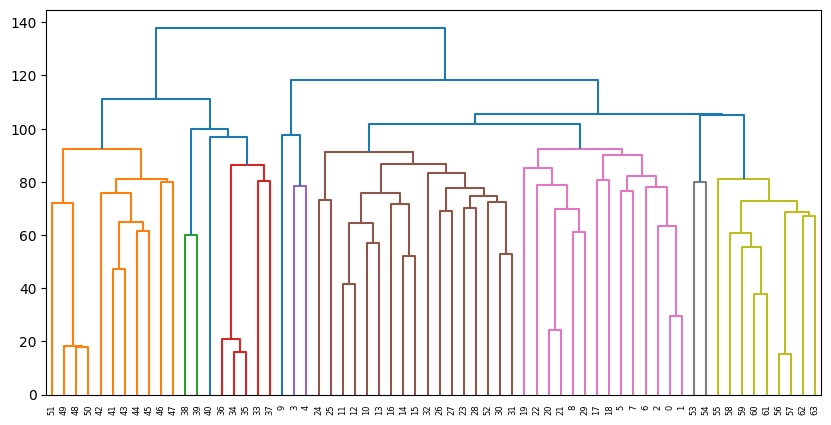

In [33]:
plt.figure(figsize=(10,5))
dendrogram(mergings)
plt.show()

In [34]:
labels = fcluster(mergings, 85, criterion='distance')

In [35]:
y['hc_clusters']=labels

In [36]:
y

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,hc_clusters
0,-20.178901,-0.028234,5.898787,4.815400,4.869198,18.104104,-8.145323,22.706564,-16.688720,-4.747185,...,6.503237,2.764233,-1.858372,-1.344651,2.339671,-0.699413,-1.354084,4.850334,5.812717,15
1,-21.927186,1.544122,8.950589,6.667258,2.162471,16.078005,-11.055368,24.780117,-19.710835,-11.758788,...,0.948760,-2.541878,2.328720,2.594235,2.129799,-4.448434,-5.863027,-4.664542,0.640770,15
2,-25.809998,-1.444318,6.883546,3.177898,10.904174,16.136831,0.298023,5.630941,-5.901164,0.935845,...,1.777416,-12.748742,7.248836,-8.325411,-9.747813,-1.173007,19.033145,3.836543,-5.307270,15
3,-36.015498,12.018860,4.813126,17.608981,16.331533,33.273364,2.485405,3.841488,4.992125,-3.528734,...,-6.226497,11.167771,8.186043,1.024203,-0.031234,-5.222368,-3.362784,-5.170854,-9.833682,7
4,-48.629903,2.136663,16.757318,18.230964,14.340266,18.580478,26.961883,-6.318432,15.754530,5.939996,...,8.239098,-3.245473,-10.396560,3.201960,-0.241623,-3.381706,-0.790640,-1.205066,5.151457,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-14.861246,44.371585,-14.843046,-7.965730,-1.476332,-5.329850,1.257102,-3.990506,18.714396,-3.903492,...,-5.422439,-9.620444,-6.954443,5.510125,-9.463817,5.167187,-6.376008,-1.765663,-7.663314,17
60,-1.596639,35.378287,-11.259917,-0.498856,2.123243,-4.299920,-1.861336,1.012899,12.323170,-0.131133,...,5.070334,-4.870977,5.763201,5.266581,2.031916,-1.742633,5.604326,-5.949810,2.242528,17
61,-13.822620,33.511078,-14.754605,-0.252203,2.404024,-0.874952,1.051662,-0.092561,6.948748,1.343054,...,11.603573,1.591706,1.709035,0.010880,7.701385,-3.403059,1.902359,-6.877835,-2.746495,17
62,-12.188662,45.392985,-10.066239,-1.029449,2.461828,-1.717472,2.584998,0.919203,4.076526,4.772540,...,-9.963372,-4.471526,4.203789,-8.611994,5.732299,-0.114443,-1.399128,2.064381,-1.966161,17


# Comparison of clusterds  with and without PCA

In [37]:
y['hc_clusters'].value_counts()

17    9
11    8
10    7
2     7
15    6
12    5
1     4
4     3
14    2
7     2
5     2
3     2
16    2
9     2
13    1
8     1
6     1
Name: hc_clusters, dtype: int64

In [38]:
x['hc_clusters'].value_counts()

17    12
10     9
16     7
2      7
14     5
1      4
4      3
13     2
11     2
5      2
3      2
7      2
9      2
15     2
12     1
8      1
6      1
Name: hc_clusters, dtype: int64

In [39]:
y['hc_clusters'].describe()

count    64.000000
mean      9.781250
std       5.340676
min       1.000000
25%       4.750000
50%      11.000000
75%      15.000000
max      17.000000
Name: hc_clusters, dtype: float64

In [40]:
x['hc_clusters'].describe()

count    64.00000
mean     10.28125
std       5.71400
min       1.00000
25%       4.75000
50%      10.00000
75%      16.00000
max      17.00000
Name: hc_clusters, dtype: float64